# Showing MK's Impact Using PIT

The DC government has questioned whether Miriam's Kitchen (MK) is worth the cost. The government would rather spend 20,000 on private housing as compared to 40,000 for MK initiatives. Using Point in Time data (how many homeless people were on the streets or sheltered at a given point of time) for Federal CoC (Continuum of Care), Federal State, and MK, we can compare how MK does as compared to other homeless efforts in DC. 

We'll be using Federal State, Federal CoC, and MK data. For each, we'll take the PIT for both sheltered homeless and overall homeless from the years 2007-2018. Since there are vastly more homeless in DC State and DC CoC programs than there are in MK, we'll instead compare the ratio of sheltered homeless PIT and overall homeless PIT for each of those 3 categories. 

### Load in Data

In [9]:
federal_folder = 'federal_data'
mk_folder = 'mk_data'
federal_coc_pit_file = '2007-2018-PIT-Counts-by-CoC'
federal_state_pit_file = '2007-2018-PIT-Counts-by-State'
mk_pit_file = 'Cumulative_MK_PIT_Cleaned_Results_2007_to_2018'

import pandas as pd
from pandas import Series,DataFrame

federal_coc_pit_excel_file = pd.ExcelFile('../data/' + federal_folder + '/' + federal_coc_pit_file + '.xlsx')
federal_state_pit_excel_file = pd.ExcelFile('../data/' + federal_folder + '/' + federal_state_pit_file + '.xlsx')

mk_pit_excel_file = pd.ExcelFile('../data/' + mk_folder + '/' + mk_pit_file + '.xlsx')

mk_pit_data = pd.read_excel(mk_pit_excel_file, 'Sheet2')
mk_pit_data = {str(key).replace(' ', ''): val  
     for key, val in mk_pit_data.items()} 

Federal CoC and Federal State has only one entry for DC State. We hardcoded the row number for each Federal DC CoC and Federal DC State. 

In [10]:
state_key = 7
coc_key = 68

ratio_th_dict = {}

ratio = lambda subset,total: subset/total 

for mk_key in mk_pit_data.keys():
    if 'Unnamed' not in str(mk_key):
    
        federal_state_pit_data = pd.read_excel(federal_state_pit_excel_file, str(mk_key))
        federal_coc_pit_data = pd.read_excel(federal_coc_pit_excel_file, str(mk_key))
        
        ratio_th_dict[mk_key] = {}
        
        ratio_th_dict[mk_key]['Federal State PIT'] = ratio(federal_state_pit_data['Sheltered TH Homeless, ' + str(mk_key)][state_key], federal_state_pit_data['Overall Homeless, ' + str(mk_key)][state_key])
        ratio_th_dict[mk_key]['Federal CoC PIT'] = ratio(federal_coc_pit_data['Sheltered TH Homeless, ' + str(mk_key)][coc_key], federal_coc_pit_data['Overall Homeless, ' + str(mk_key)][coc_key]) 
        #ratio_th_dict[mk_key]['MK PIT'] = ratio(int(float(mk_pit_data[str(mk_key)]['Shelter / Transitional Housing']) * int(mk_pit_data[str(mk_key)]['Surveys Completed'])), int(mk_pit_data[str(mk_key)]['Surveys Completed']))
        ratio_th_dict[mk_key]['MK PIT'] = float(mk_pit_data[str(mk_key)][47]) 

In [11]:
ratio_th_pit_df = pd.DataFrame(data = ratio_th_dict).T

ratio_th_pit_df.head(12)

,Federal CoC PIT,Federal State PIT,MK PIT
2007,0.391140,0.325564,0.62
2008,0.323832,0.364494,0.57
2009,0.239836,0.416185,0.54
2010,0.217072,0.384157,0.57
2011,0.407986,0.397189,0.55
2012,0.077504,0.359937,0.31
2013,0.191669,0.341296,0.35
2014,0.241522,0.206247,0.54
2015,0.228693,0.228693,0.36
2016,0.212335,0.212335,0.24


In [43]:
ratio_th_pit_df.describe()

,Federal CoC PIT,Federal State PIT,MK PIT
count,12.000000,12.000000,12.000000
mean,0.256746,0.297794,0.430000
std,0.098682,0.093513,0.147155
min,0.077504,0.162318,0.230000
25%,0.207169,0.210813,0.302500
50%,0.234265,0.333430,0.450000
75%,0.336435,0.369409,0.555000
max,0.407986,0.416185,0.620000


We can see MK PIT has a higher mean, min, and max. So it shows it is having an impact. Let's make some visualizations. 

### Violin Plot

Below, we can see that MK PIT has a higher success ratio of shelterhing homeless people point in time than federal CoC and Federal State. Further proving that MK PIT makes a strong impact.

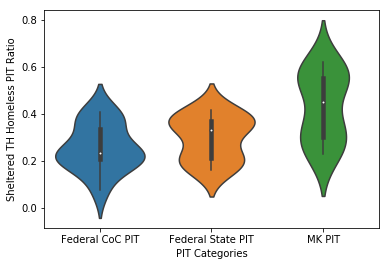

In [13]:
import seaborn as sns

sns.violinplot(x="PIT Categories", y="Sheltered TH Homeless PIT Ratio", data=pd.melt(ratio_th_pit_df, var_name='PIT Categories', value_name='Sheltered TH Homeless PIT Ratio'))

With 12 data points, we can simply display a swarm plot below.

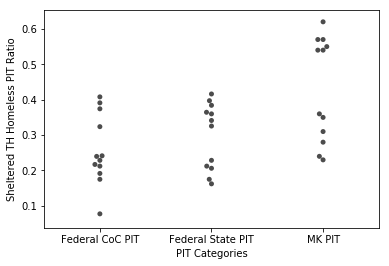

In [14]:

sns.swarmplot(x="PIT Categories", y="Sheltered TH Homeless PIT Ratio", data=pd.melt(ratio_th_pit_df, var_name='PIT Categories', value_name='Sheltered TH Homeless PIT Ratio'), color='k', alpha=0.7)

Displaying violin and swarm plots together.

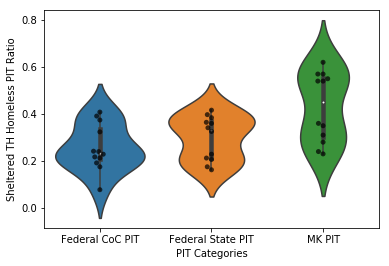

In [15]:
sns.violinplot(x="PIT Categories", y="Sheltered TH Homeless PIT Ratio", data=pd.melt(ratio_th_pit_df, var_name='PIT Categories', value_name='Sheltered TH Homeless PIT Ratio'))

sns.swarmplot(x="PIT Categories", y="Sheltered TH Homeless PIT Ratio", data=pd.melt(ratio_th_pit_df, var_name='PIT Categories', value_name='Sheltered TH Homeless PIT Ratio'), color='k', alpha=0.7)

So MK has a higher mean than Federal COC and Federal State. This shows that MK has a big impact on DC homeless efforts on average. Let's look at the KDE.

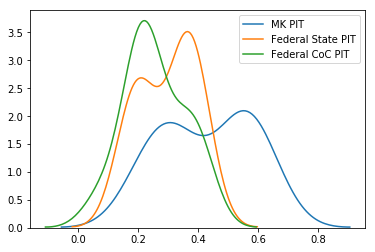

In [42]:
sns.kdeplot(ratio_th_pit_df['MK PIT'])
sns.kdeplot(ratio_th_pit_df['Federal State PIT'])
sns.kdeplot(ratio_th_pit_df['Federal CoC PIT'])

While this is redundant since it is half of a violin plot, it is good to see the distribution in a clear setting. But this implies that MK PIT and Federal State PIT may be bimodal, given the two peaks. Let's check the distplot to see if that's the case. 

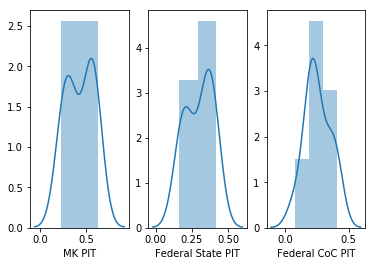

In [33]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(1, 3)
sns.distplot(ratio_th_pit_df['MK PIT'], ax=axes[0])
sns.distplot(ratio_th_pit_df['Federal State PIT'], ax=axes[1])
sns.distplot(ratio_th_pit_df['Federal CoC PIT'], ax=axes[2])

There doesn't seem to be two humps in any of the histograms. So we can conclude that the data is not bimodal. The two humps shown in the kde is likely a result of the bandwidth of the kde plots not being set properly. What happens if we increase the bandwidth to 0.2?

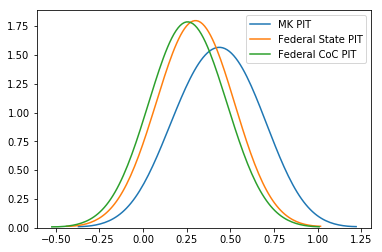

In [52]:
sns.kdeplot(ratio_th_pit_df['MK PIT'], bw=0.2)
sns.kdeplot(ratio_th_pit_df['Federal State PIT'], bw=0.2)
sns.kdeplot(ratio_th_pit_df['Federal CoC PIT'], bw=0.2)

### 2 sample t-test

Now, we want to do a 2 sample t-test to see if MK PIT has a strong impact on Federal CoC PIT and Federal State PIT. Reason for this test is that we're comparing two statistics from two samples, both with interval data. Plus, the sample size is small ( < 30) and wider tails of the KDEs imply a t-distribution.  

We will conduct two t-tests: one with Federal State PIT and MK PIT, another with Federal CoC PIT and MK PIT. Confidence interval both at 95% (0.05 significance level - the probability of making a Type I error).

Our hypothesis is that MK PIT strongly impacts Federal CoC or Federal State PIT. Considering Federal State and CoC encompass homeless efforts in DC, it would make sense for MK to be a part of that. Our null hypothesis is that MK has no effect on Federal COC/Federal State. 

In [53]:
# Chi-squared test with similar proportions 
from scipy import stats

#### Federal State vs MK

In [54]:
t, p = stats.ttest_ind(ratio_th_pit_df['MK PIT'].tolist(), ratio_th_pit_df['Federal State PIT'].tolist(), None, False)
print('MK and Federal State PIT: T-stat=%.3f, p-val=%.3f' % (t, p))

MK and Federal State PIT: T-stat=2.627, p-val=0.017


Since the p-value is less than our significance level, we reject our null hypothesis. MK PT data strongly impacts  Federal State PIT data.

#### Federal CoC vs MK

In [55]:
t, p = stats.ttest_ind(ratio_th_pit_df['MK PIT'].tolist(), ratio_th_pit_df['Federal CoC PIT'].tolist(), None, False)
print('MK and Federal CoC PIT: T-stat=%.3f, p-val=%.3f' % (t, p))


MK and Federal CoC PIT: T-stat=3.387, p-val=0.003


Since the p-value is less than our significance level, we reject our null hypothesis. MK PT data strongly impacts Federal CoC PIT data.